In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    '../plant_tree',
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)

Found 2152 files belonging to 3 classes.


In [3]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [4]:
len(dataset)

68

here in the above code the 68 comes because in the we make the batch size of 32 which dvide the 2152 files in 68 batches size of 32 

In [5]:
68*32

2176

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)   # here 3 represent the rgb channels
    print(label_batch.numpy())
    

(32, 256, 256, 3)
[0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1]


In [7]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


Text(0.5, 1.0, 'Potato___Late_blight')

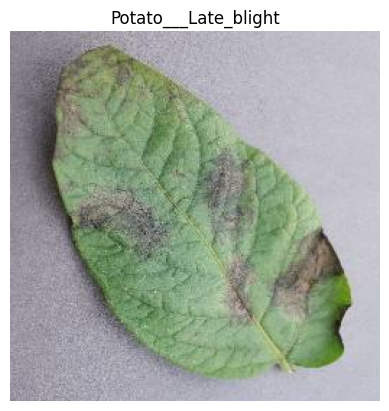

In [8]:
plt.imshow(image_batch[0].numpy().astype("uint32"))
plt.axis('off')
plt.title(class_names[label_batch[0]])

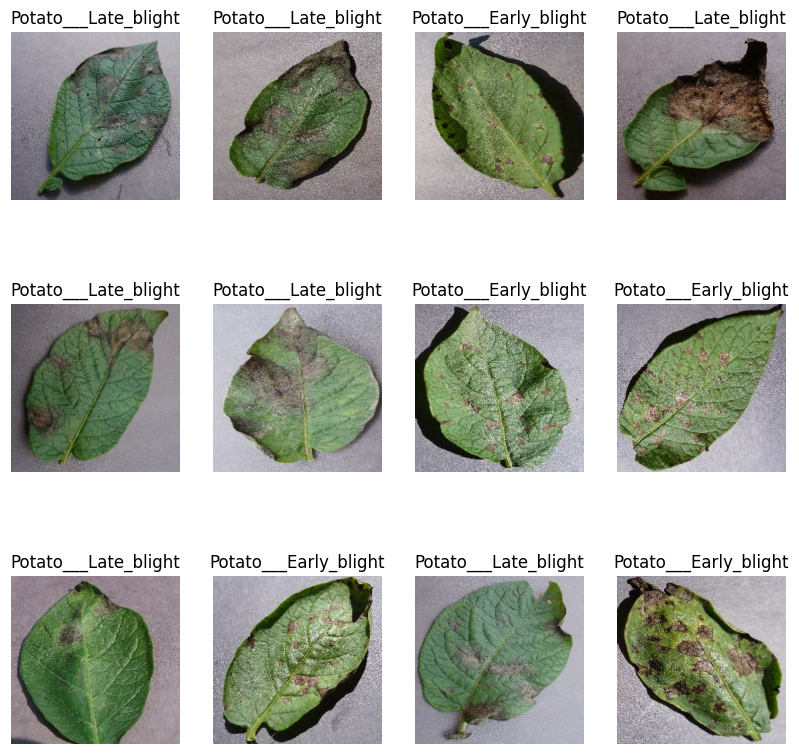

In [9]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

WE USE DATA AS AND DIVIDE THE DATA AS 

80 % data is for the training,
10 % data is for the validation,
10 % data id for the testing.

In [10]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [11]:
train_ds=dataset.take(54)
len(train_ds)

54

In [12]:
test_ds=dataset.skip(54)  # here skip is treated by skipping the initial batches and take rest batches ,............in this it skip the 54 batches and takes the 14 battches as for the test dataset
len(test_ds)

14

In [13]:
val_Size=0.1
len(dataset)*val_Size

6.800000000000001

In [14]:
val_ds=dataset.take(6)
len(val_ds)

6

In [15]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [16]:
len(train_ds),len(val_ds),len(test_ds)

(54, 6, 8)

TO MAKE A THINGS SIMPLER WE MAKE A FUNCTION FOR THIS

In [17]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
   ds_size = len(ds)
   if shuffle:
      ds.shuffle(shuffle_size, seed=12)
   train_size = int(train_split * ds_size)
   val_size = int(val_split * ds_size)
   train_ds = ds. take (train_size)
   val_ds = ds.skip (train_size). take (val_size)
   test_ds = ds.skip(train_size). skip (val_size)
   return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [19]:
len(train_ds)

54

In [20]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Caching stores the dataset in memory after it is read for the first time, which can speed up 
# subsequent epochs as the data doesn't need to be reloaded from disk.
# Prefetching overlaps the preprocessing of data with model training. It allows 
# the dataset to load the next batch of data while the current batch is being processed by the model, reducing idle time.
# Using tf.data.AUTOTUNE automatically adjusts the buffer size based on available system resources, optimizing performance.

test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

..............
scalling and resizing

In [21]:
import tensorflow
from tensorflow.keras import layers

resize_and_scaling = tf.keras.Sequential([
    layers.Resizing(255,255),
    layers.Rescaling(1.0/255)
    
])

In [22]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
    
])

In [23]:
from tensorflow.keras import  models  
model=models.Sequential([
    resize_and_scaling,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,255,255,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,255,255,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,255,255,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,255,255,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,255,255,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,255,255,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax'),
])

model.build(input_shape=(32,255,255,3))

C:\Users\vasum\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 255, 255, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 255, 255, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 253, 253, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 126, 126, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 124, 124, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
history=model.fit(
    train_ds,
    epochs=5,
    verbose=1,
    validation_data=val_ds
)


Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.4769 - loss: 0.9297 - val_accuracy: 0.5312 - val_loss: 0.8427
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 577ms/step - accuracy: 0.6020 - loss: 0.7981 - val_accuracy: 0.5938 - val_loss: 0.8248
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 559ms/step - accuracy: 0.8240 - loss: 0.4518 - val_accuracy: 0.7604 - val_loss: 0.5075
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.8859 - loss: 0.2815 - val_accuracy: 0.8646 - val_loss: 0.3909
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.8827 - loss: 0.3230 - val_accuracy: 0.9010 - val_loss: 0.2348


In [27]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 419ms/step - accuracy: 0.9084 - loss: 0.2629


In [28]:
scores

[0.24963916838169098, 0.9137930870056152]

In [29]:
history

In [30]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [31]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
history.history['accuracy']

[0.5173611044883728,
 0.6707175970077515,
 0.84375,
 0.8842592835426331,
 0.8773148059844971]

In [33]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']


Text(0.5, 1.0, 'training and validation loss')

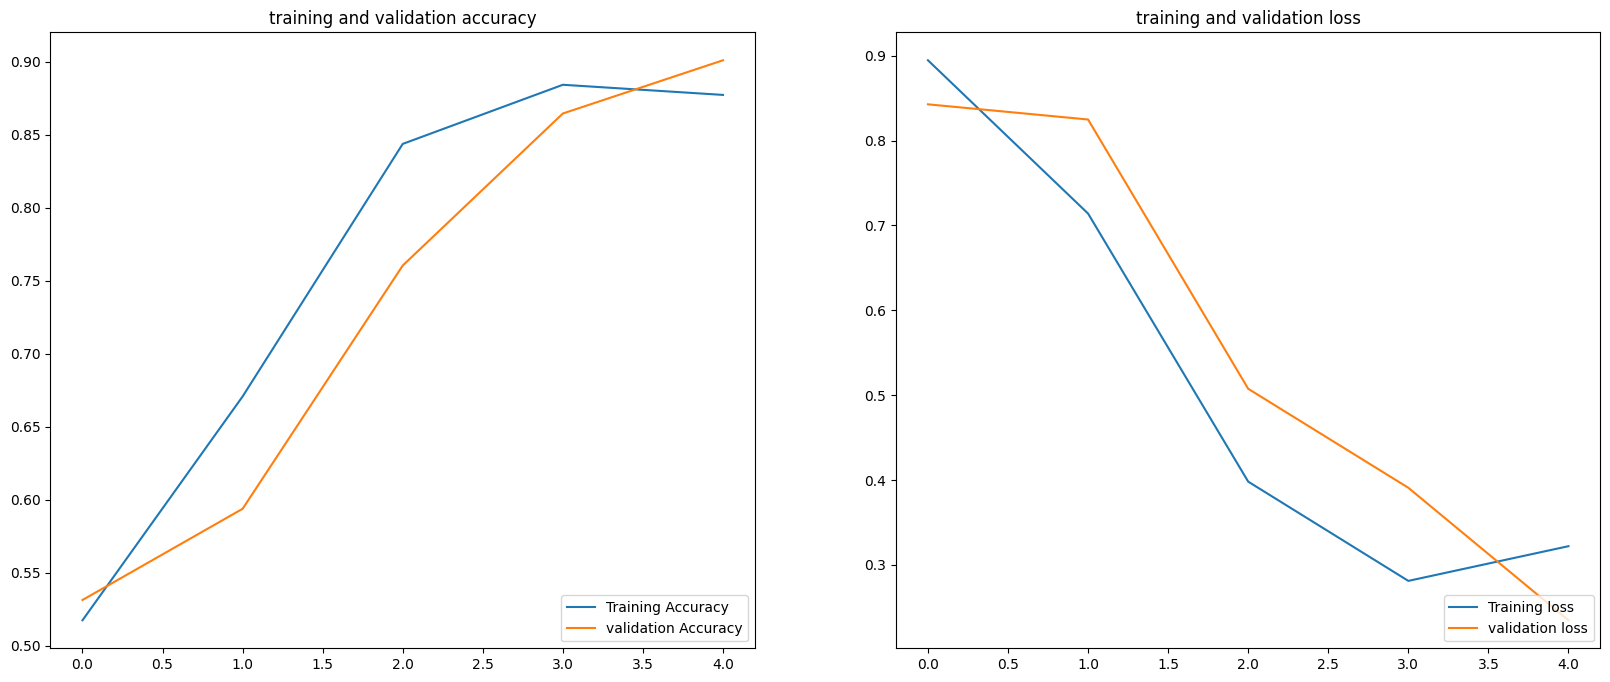

In [34]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(range(5),acc,label='Training Accuracy')
plt.plot(range(5),val_acc,label='validation Accuracy')
plt.legend(loc='lower right')
plt.title("training and validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(5),loss,label='Training loss')
plt.plot(range(5),val_loss,label='validation loss')
plt.legend(loc='lower right')
plt.title("training and validation loss")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
predicted label: Potato___Early_blight
ACTUAL LABEL: Potato___Early_blight


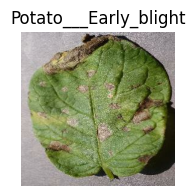

In [35]:
for image_batch,label_batch in test_ds.take(1):
    # print(image_batch[0].numpy().astype("uint32"))
    # print(label_batch[0])
    plt.figure(figsize=(2,2))
    plt.imshow(image_batch[0].numpy().astype("uint32"))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')
    print('predicted label:',class_names[np.argmax(model.predict(image_batch[0:1]))])
    print('ACTUAL LABEL:',class_names[label_batch[0]])

In [36]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(img)
    img_array=tf.expand_dims(img_array,0)
    
    # Neural networks in TensorFlow are designed to process data in batches, even if there's only one image.
    # The tf.expand_dims() step ensures that your data is in the correct format (batch_size, height, width, channels),
    # even if you're working with just one image. This small adjustment prevents errors and ensures compatibility with
    # TensorFlow models.

    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


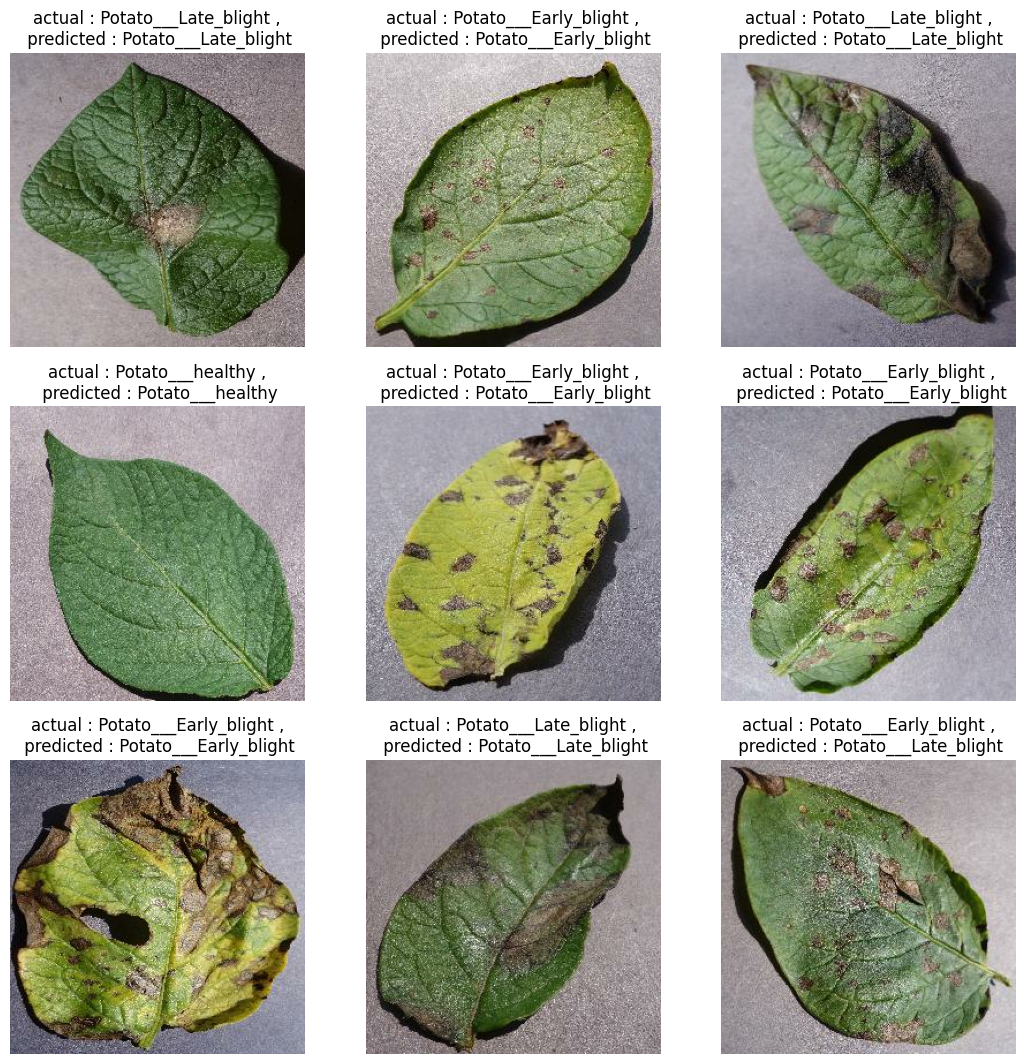

In [37]:
plt.figure(figsize=(13,13))
for images,labels in test_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint32"))
        title,p=predict(model,images[i])
        plt.title(f'actual : {class_names[labels[i]]} ,\n predicted : {title}')
        plt.axis('off')

In [38]:
import os 
os.listdir('../models')

['1', '2', 'models.config']

In [39]:
model_version = 2
model.export(f"../models/{model_version}")

# export function saves the model in the specified directory.
# we use the model.export function to save the model instead of the using pickle or joblib because the model is a tensorflow model and it is saved in the .h5 format.


INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


Saved artifact at '../models/2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 255, 255, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2701269294288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2701269294480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2701269297360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2701269297744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2701269296976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2701269298704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2701269298320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2701269299088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2701269298128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2701269299472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2701269297936: TensorSpec(shape=(), dty

In [40]:
import os
os.makedirs('../models/1', exist_ok=True)


In [41]:
model.save('../models/1/model.keras')
